# Introduction

 In this project,the task is to build a model to predict both an individual’s sex and their ADHD
 diagnosis using functional brain imaging data of children and adolescents and their socio-demographic,
 emotions, and parenting information.

# Loading & Exploring Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

data_dict_path = '/content/drive/MyDrive/datasets/Data_Dictionary.xlsx'

# Read the Excel file
data_dict = pd.read_excel(data_dict_path)

# Display the first few rows
data_dict.head()


,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN


In [3]:
# Load the TRAIN excel sheets

train_quantitative_path = '/content/drive/MyDrive/datasets/TRAIN_QUANTITATIVE_METADATA_new.xlsx'
train_categorical_path = '/content/drive/MyDrive/datasets/TRAIN_CATEGORICAL_METADATA_new.xlsx'
training_solutions_path = '/content/drive/MyDrive/datasets/TRAINING_SOLUTIONS.xlsx'
train_functional_matrices_path = '/content/drive/MyDrive/datasets/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv'

# Read the TRAIN excel sheets
train_quantitative_df = pd.read_excel(train_quantitative_path)
train_categorical_df = pd.read_excel(train_categorical_path)
training_solutions_df = pd.read_excel(training_solutions_path)
train_functional_matrices_df = pd.read_csv(train_functional_matrices_path)

# Preview them
print("Quantitative shape:", train_quantitative_df.shape)
print("Qualitative shape:", train_categorical_df.shape)
print("Solutions shape:", training_solutions_df.shape)
print("Functional shape:", train_functional_matrices_df.shape)

Quantitative shape: (1213, 19)
Qualitative shape: (1213, 10)
Solutions shape: (1213, 3)
Functional shape: (304, 19901)


In [4]:
# Define the file paths for the TEST datasets
test_quantitative_path = '/content/drive/MyDrive/datasets/TEST_QUANTITATIVE_METADATA.xlsx'
test_categorical_path = '/content/drive/MyDrive/datasets/TEST_CATEGORICAL.xlsx'
test_functional_matrices_path = '/content/drive/MyDrive/datasets/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv'

# Load the test data
test_quantitative_df = pd.read_excel(test_quantitative_path)
test_categorical_df = pd.read_excel(test_categorical_path)
test_functional_matrices_df = pd.read_csv(test_functional_matrices_path)

# Preview the dimensions of each dataset
print("Test Quantitative Metadata shape:", test_quantitative_df.shape)
print("Test Categorical Metadata shape:", test_categorical_df.shape)
print("Test Functional Connectome Matrices shape:", test_functional_matrices_df.shape)


Test Quantitative Metadata shape: (304, 19)
Test Categorical Metadata shape: (304, 10)
Test Functional Connectome Matrices shape: (304, 19901)


In [ ]:
data_dict

,DataType,Instrument,Field,Description,Type,Labels
0,QUANTITATIVE METADATA,NaN,NaN,NaN,NaN,NaN
1,NaN,Identifier,participant_id,Participant ID,str,NaN
2,Quantitative,Edinburgh Handedness Questionnaire,EHQ_EHQ_Total,Laterality Index (Score),float,-100 = 10th left\n−28 ≤ LI < 48 = middle\n100 ...
3,Quantitative,Ishihara Color Vision Test,ColorVision_CV_Score,Color vision test score,int,NaN
4,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_CP,Corporal Punishment Score,int,NaN
5,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_ID,Inconsistent Discipline Score,int,NaN
6,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_INV,Involvement Score,int,NaN
7,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_OPD,Other Discipline Practices Score (Not factored...,int,NaN
8,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PM,Poor Monitoring/Supervision Score,int,NaN
9,Quantitative,Alabama Parenting Questionnaire - Parent Report,APQ_P_APQ_P_PP,Positive Parenting Score,int,NaN


In [ ]:
train_quantitative_df

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,17.0,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,20.0,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,24.0,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,5.0,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,23.0,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,20.0,5.0,13.0,5.0,8.0,7.0,2.0,8.0,11.272986
1209,zwXD5v17Rx01,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020
1210,zWzLCi3NTBTd,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,14.0,3.0,9.0,3.0,7.0,5.0,2.0,9.0,9.962126
1211,Zy9GTHDxUbXU,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,10.0,0.0,8.0,5.0,7.0,2.0,2.0,7.0,NaN


In [ ]:
train_categorical_df

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,00aIpNTbG5uh,2019,4,1.0,0.0,3.0,21.0,45.0,NaN,NaN
1,00fV0OyyoLfw,2017,1,0.0,9.0,2.0,21.0,0.0,21.0,45.0
2,04X1eiS79T4B,2017,1,1.0,2.0,2.0,9.0,0.0,NaN,NaN
3,05ocQutkURd6,2018,1,3.0,8.0,2.0,18.0,10.0,18.0,0.0
4,06YUNBA9ZRLq,2018,1,0.0,1.0,2.0,12.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,2019,4,1.0,1.0,3.0,12.0,NaN,15.0,5.0
1209,zwXD5v17Rx01,2018,1,0.0,0.0,3.0,21.0,40.0,21.0,40.0
1210,zWzLCi3NTBTd,2018,3,2.0,3.0,3.0,21.0,40.0,21.0,35.0
1211,Zy9GTHDxUbXU,2019,4,0.0,1.0,3.0,18.0,35.0,18.0,45.0


In [ ]:
training_solutions_df

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1
...,...,...,...
1208,Atx7oub96GXS,0,0
1209,groSbUfkQngM,0,1
1210,zmxGvIrOD0bt,0,1
1211,rOmWFuJCud5G,0,0


In [ ]:
train_functional_matrices_df

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,0.548480,0.713607,0.557319,0.524369,0.693364,0.770032,0.724406,0.390118,0.547912,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,0.427740,0.363022,0.402862,0.363003,0.534558,0.345347,0.409471,0.303328,0.402515,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,0.139572,0.390106,-0.087041,0.196852,0.088148,0.023843,0.381782,0.068979,0.377488,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,0.133561,0.778326,0.416355,0.471840,0.568460,0.633660,0.501113,0.345461,0.467943,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,0.126699,0.575446,0.509422,0.363193,0.427544,0.449924,0.451796,0.223927,0.298248,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,UadZfjdEg7eG,0.029721,0.596742,0.361898,0.292066,0.553130,0.476284,0.543970,0.372932,0.595183,...,0.021524,-0.162832,0.105546,0.028975,0.576180,0.378365,0.399277,0.556115,0.490833,0.568742
300,IUEHiLmQAqCi,0.025985,0.347840,0.304804,0.463090,0.305321,0.267397,0.468712,0.155677,0.298155,...,0.044974,-0.078047,-0.118271,0.035741,0.640073,0.515096,0.206462,0.536001,0.318518,0.305596
301,cRySmCadYFRO,0.105385,0.443624,-0.019777,0.435582,0.376492,0.619322,0.430177,0.567600,0.399820,...,0.145582,0.004455,0.134574,-0.152951,0.782938,0.737555,0.593972,0.734463,0.680979,0.678973
302,E3MvDUtJadc5,0.345641,0.758986,0.748153,0.442141,0.571924,0.485011,0.530513,0.137672,0.467144,...,0.036169,-0.345563,-0.165280,-0.347035,0.657024,0.590523,0.094565,0.727339,0.429694,0.530238


##Exploratory Data Analysis (EDA)


# Categorical Analysis:


In [ ]:
test_categorical_df.info()
test_categorical_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    304 non-null    object 
 1   Basic_Demos_Enroll_Year           304 non-null    int64  
 2   Basic_Demos_Study_Site            304 non-null    int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  301 non-null    float64
 4   PreInt_Demos_Fam_Child_Race       298 non-null    float64
 5   MRI_Track_Scan_Location           304 non-null    int64  
 6   Barratt_Barratt_P1_Edu            303 non-null    float64
 7   Barratt_Barratt_P1_Occ            303 non-null    float64
 8   Barratt_Barratt_P2_Edu            268 non-null    float64
 9   Barratt_Barratt_P2_Occ            262 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 23.9+ KB


,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,304,304.000000,304.000000,301.000000,298.000000,304.000000,303.000000,303.000000,268.000000,262.000000
unique,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Jv1UeLkc4beo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2022.197368,4.009868,0.355482,2.231544,3.638158,19.128713,29.389439,18.458955,35.763359
std,NaN,0.494718,0.099012,0.665741,3.392914,0.481326,2.680553,16.484193,3.087093,11.978162
min,NaN,2019.000000,4.000000,0.000000,0.000000,3.000000,3.000000,0.000000,3.000000,0.000000
25%,NaN,2022.000000,4.000000,0.000000,0.000000,3.000000,18.000000,25.000000,18.000000,30.000000
50%,NaN,2022.000000,4.000000,0.000000,0.000000,4.000000,21.000000,35.000000,18.000000,40.000000
75%,NaN,2022.000000,4.000000,1.000000,3.000000,4.000000,21.000000,45.000000,21.000000,45.000000


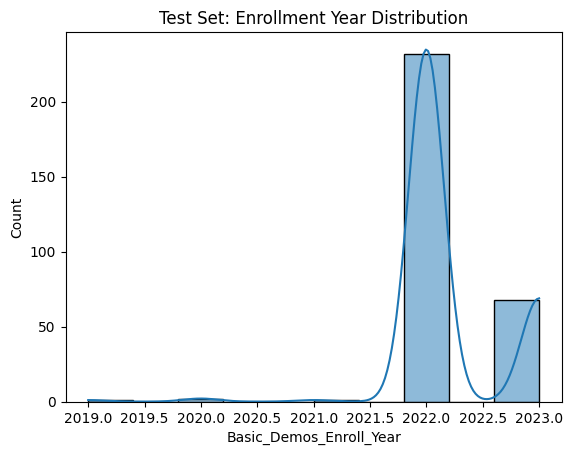

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=test_categorical_df, x="Basic_Demos_Enroll_Year", kde=True)
plt.title("Test Set: Enrollment Year Distribution")
plt.show()


Observations from Test Categorical Metadata (EDA)

The Enrollment Year refers to the year in which each participant (child) was enrolled in the study

Most enrollments happened in 2022.

There’s a smaller spike in 2023.

Very few children enrolled in earlier years like 2019, 2020, and 2021.



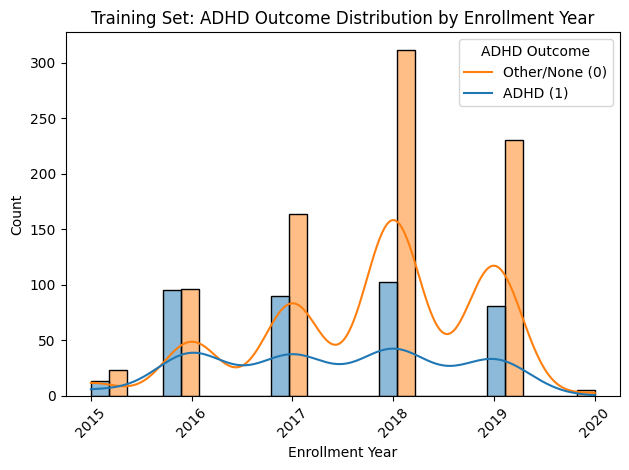

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merging the training categorical data with training solutions to get 'ADHD_Outcome'
train_merged_df = train_categorical_df.loc[:, ['Basic_Demos_Enroll_Year', 'participant_id']].merge(
    training_solutions_df[['participant_id', 'ADHD_Outcome']], on='participant_id', how='left'
).drop(columns=['participant_id'])

# Preview the merged dataframe
train_merged_df.head()

# Plotting the distribution of 'Basic_Demos_Enroll_Year' with 'ADHD_Outcome' as the hue
sns.histplot(data=train_merged_df, x="Basic_Demos_Enroll_Year", hue="ADHD_Outcome", multiple="dodge", kde=True)

# Adding plot titles and labels
plt.title("Training Set: ADHD Outcome Distribution by Enrollment Year")
plt.xlabel("Enrollment Year")
plt.ylabel("Count")
plt.legend(title="ADHD Outcome", labels=["Other/None (0)", "ADHD (1)"])

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# MRI scan location vs study site
test_categorical_df[['Basic_Demos_Study_Site','MRI_Track_Scan_Location']].value_counts(dropna=False).reset_index()


,Basic_Demos_Study_Site,MRI_Track_Scan_Location,count
0,4,4,192
1,4,3,109
2,5,4,2
3,5,3,1


Most of the data comes from Site 4, using MRI Locations 4 and 3

Sites 5 and its MRI data are very rare (only 3 samples).

In [18]:
test_categorical_df[['PreInt_Demos_Fam_Child_Ethnicity','PreInt_Demos_Fam_Child_Race']].value_counts(dropna=False).reset_index()


,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,count
0,0.0,0.0,148
1,0.0,8.0,35
2,1.0,2.0,23
3,0.0,1.0,21
4,1.0,0.0,17
5,1.0,8.0,11
6,0.0,3.0,9
7,2.0,8.0,7
8,1.0,1.0,6
9,2.0,0.0,5


**PreInt_Demos_Fam_Child_Ethnicity**: Tells us if a child is Hispanic or Latino.

0.0 = Not Hispanic
1.0 = Hispanic
NaN = Missing

**PreInt_Demos_Fam_Child_Race**:
Tells us the race of the child.

0 = White
1 = Black
2 = Hispanic
3 = Asian
8 = Two or more races
11 = Chose not to say
NaN = Missing

**Observations**:
Most common group

Ethnicity = 0 (Not Hispanic)

Race = 0 (White)
143 kids — this is the biggest group.

Next most common

Ethnicity = 0 (Not Hispanic), Race = 8 (Two or more races): 35 kids

Ethnicity = 1 (Hispanic), Race = 2 (Hispanic): 23 kids

Other groups

Many smaller groups (less than 10 kids each), like Asian, Black, or Mixed

Missing data

A few rows have missing race or ethnicity info.



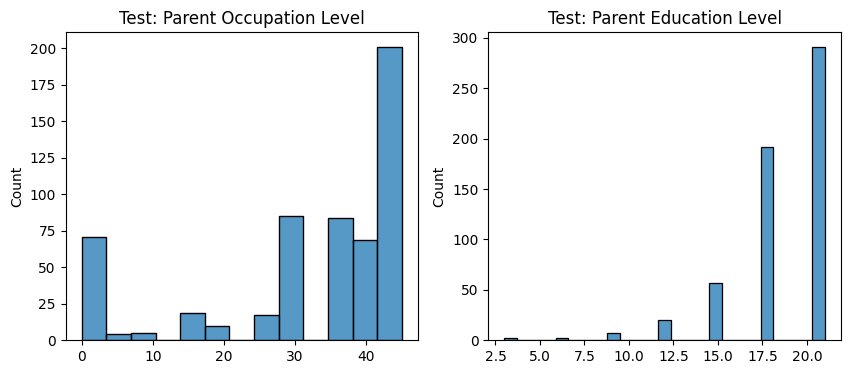

In [7]:
import numpy as np
bb_occ_test = pd.concat([
    test_categorical_df['Barratt_Barratt_P1_Occ'],
    test_categorical_df['Barratt_Barratt_P2_Occ']
])
bb_edu_test = pd.concat([
    test_categorical_df['Barratt_Barratt_P1_Edu'],
    test_categorical_df['Barratt_Barratt_P2_Edu']
])

# Plot distributions
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(data=bb_occ_test, ax=ax1)
ax1.set_title('Test: Parent Occupation Level')
sns.histplot(data=bb_edu_test, ax=ax2)
ax2.set_title('Test: Parent Education Level')
plt.show()



Parent Occupation Level (Left Chart)

Most common levels: Around 40–45 → These could represent higher-tier jobs.

Some low-level jobs (values near 0) are also frequent.

A few parents fall in mid-level jobs (15–30), but less common.


Parent Education Level (Right Chart)

Education level peaks at 18–21, which might represent college or higher degrees.

Very few parents have low education levels (below 10).

Shows that most test participants come from well-educated households.

In [8]:
test_categorical_df['single_parent'] = (
    (
        test_categorical_df['Barratt_Barratt_P1_Edu'].notnull() |
        test_categorical_df['Barratt_Barratt_P1_Occ'].notnull()
    ) &
    test_categorical_df['Barratt_Barratt_P2_Edu'].isnull() &
    test_categorical_df['Barratt_Barratt_P2_Occ'].isnull()
).astype(int)

test_categorical_df['single_parent'].value_counts()


,count
single_parent,
0,272
1,32


 Single Parent Status

0 = Not a single-parent household → 272 individuals

1 = Single-parent household → 32 individuals

Most children in the test set come from two-parent households.

# Quantitative Analysis:

In [ ]:
# 1. Data Overview: Check for missing values and data types
print("\nData Types and Missing Values in Quantitative Data:")
print(train_quantitative_df.info())
print("\nMissing Values in Quantitative Data:")
print(train_quantitative_df.isnull().sum())



Data Types and Missing Values in Quantitative Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1200 non-null   float64
 2   ColorVision_CV_Score        1190 non-null   float64
 3   APQ_P_APQ_P_CP              1201 non-null   float64
 4   APQ_P_APQ_P_ID              1201 non-null   float64
 5   APQ_P_APQ_P_INV             1201 non-null   float64
 6   APQ_P_APQ_P_OPD             1201 non-null   float64
 7   APQ_P_APQ_P_PM              1201 non-null   float64
 8   APQ_P_APQ_P_PP              1201 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1204 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1204 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1204 non-null   float64
 12  SDQ_SDQ_Externalizing       1204 non-

In [ ]:
print("\nData Types and Missing Values in Categorical Data:")
print(train_categorical_df.info())
print("\nMissing Values in Categorical Data:")
print(train_categorical_df.isnull().sum())


Data Types and Missing Values in Categorical Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1170 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1159 non-null   float64
 5   MRI_Track_Scan_Location           1210 non-null   float64
 6   Barratt_Barratt_P1_Edu            1198 non-null   float64
 7   Barratt_Barratt_P1_Occ            1182 non-null   float64
 8   Barratt_Barratt_P2_Edu            1015 non-null   float64
 9   Barratt_Barratt_P2_Occ            991 non-null    float64
 10  single_parent                     1213 non-null   int64  
dtypes: float64(7), in

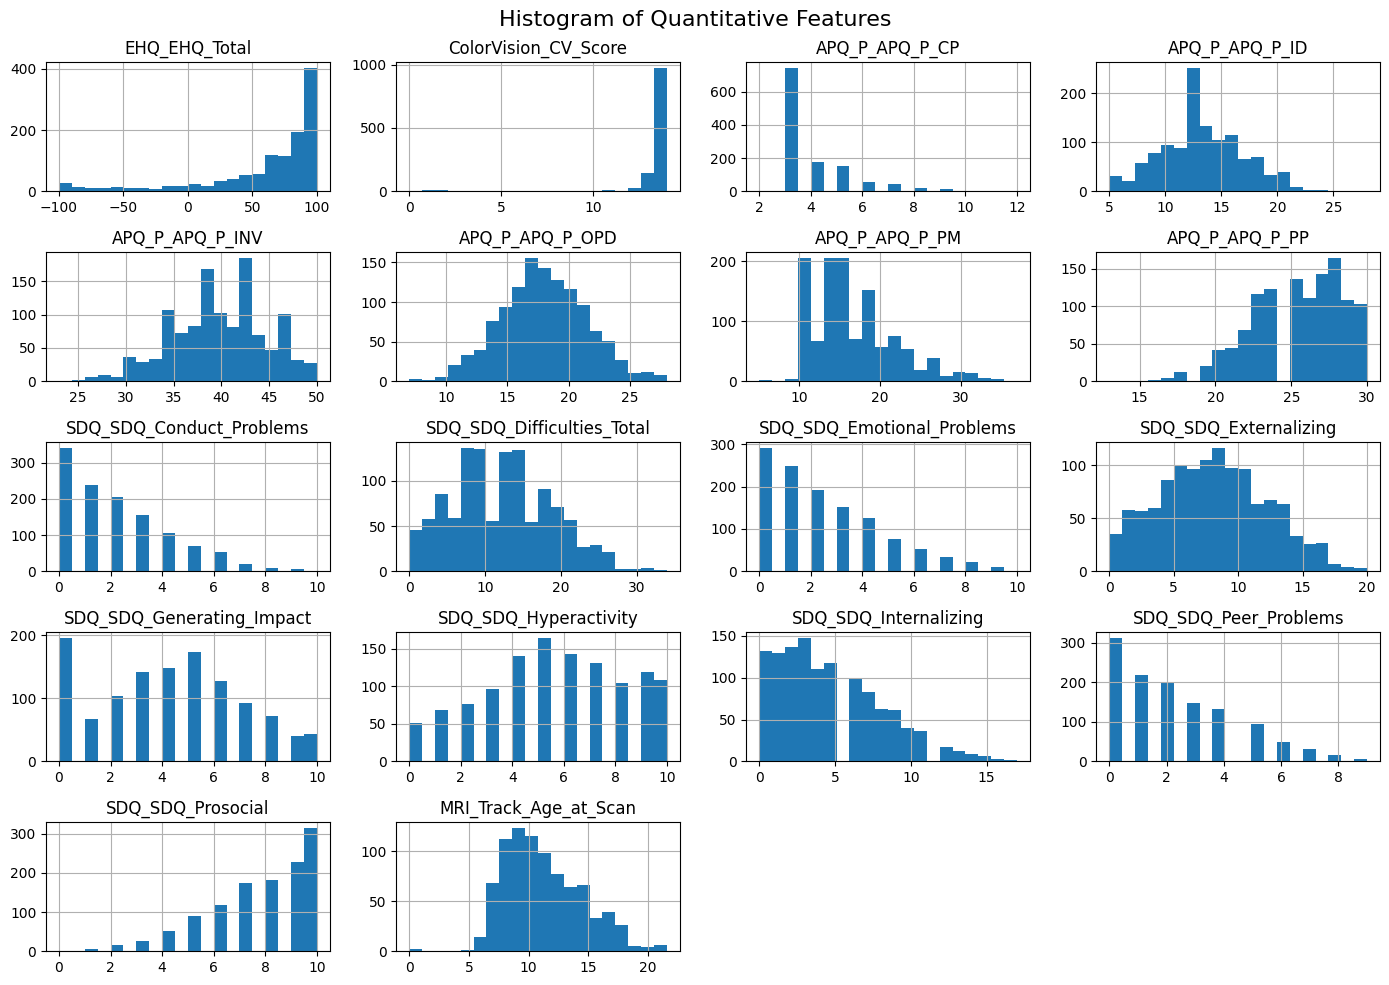

In [ ]:
# Plot histograms for each quantitative feature
train_quantitative_df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histogram of Quantitative Features", fontsize=16)
plt.tight_layout()
plt.show()

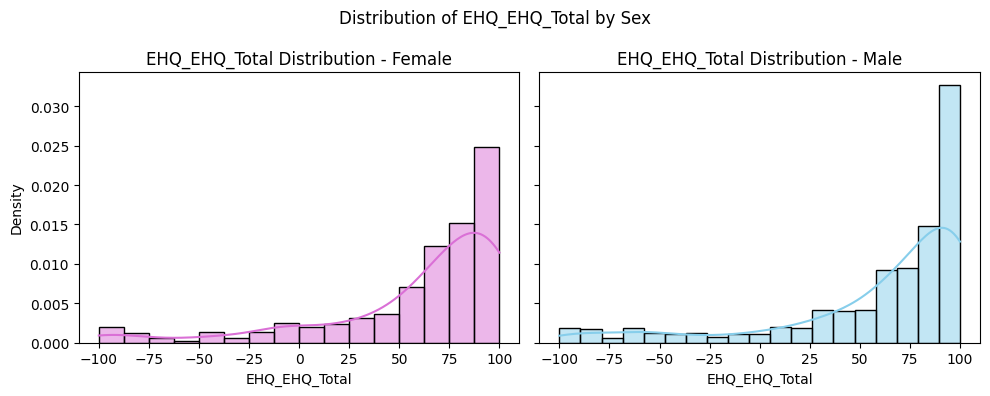

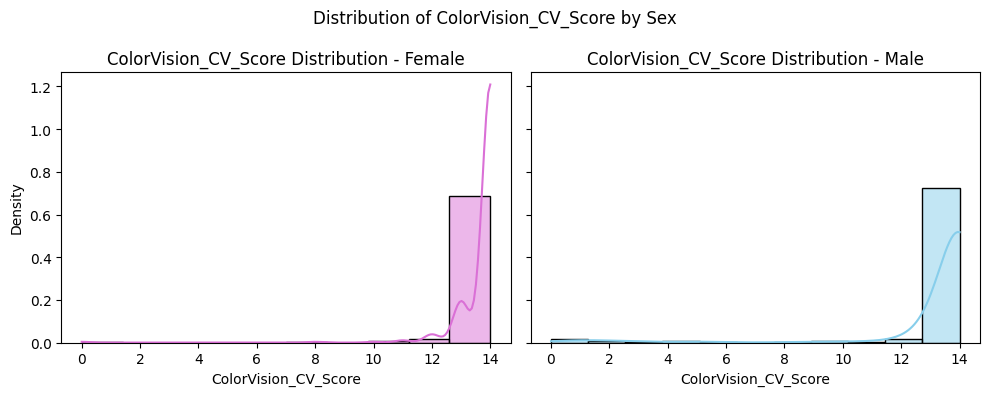

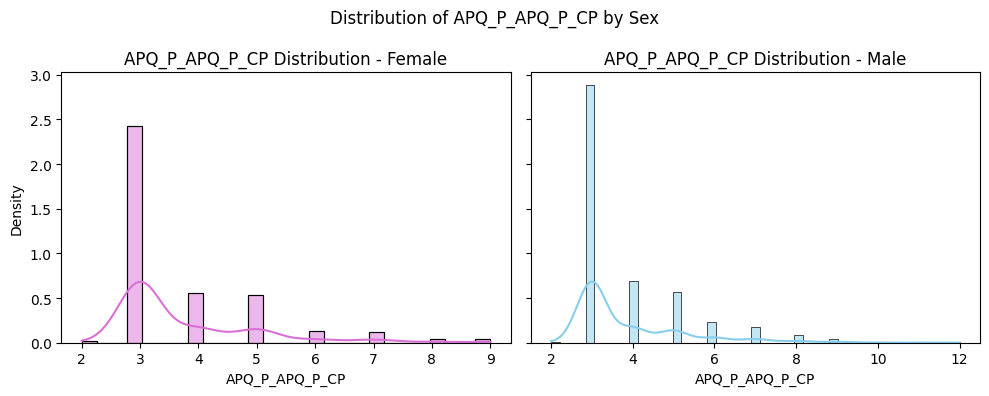

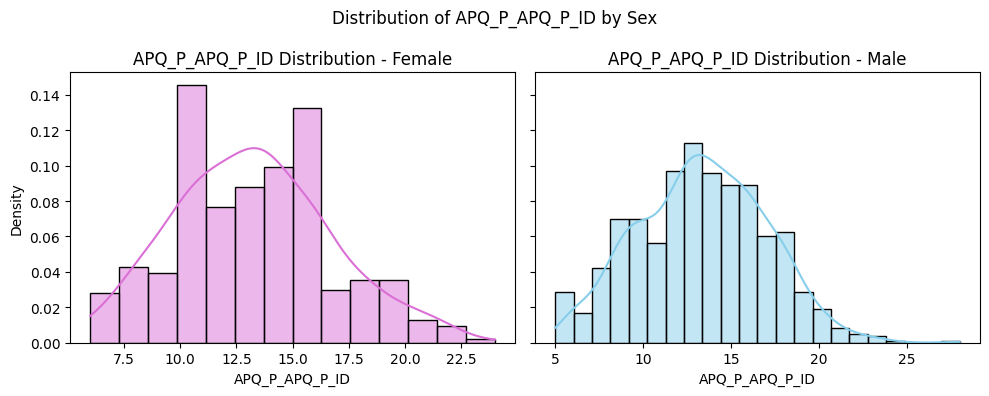

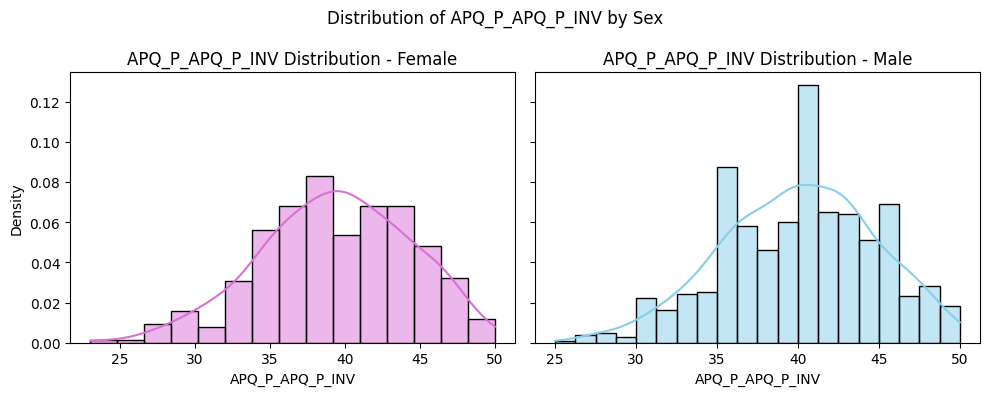

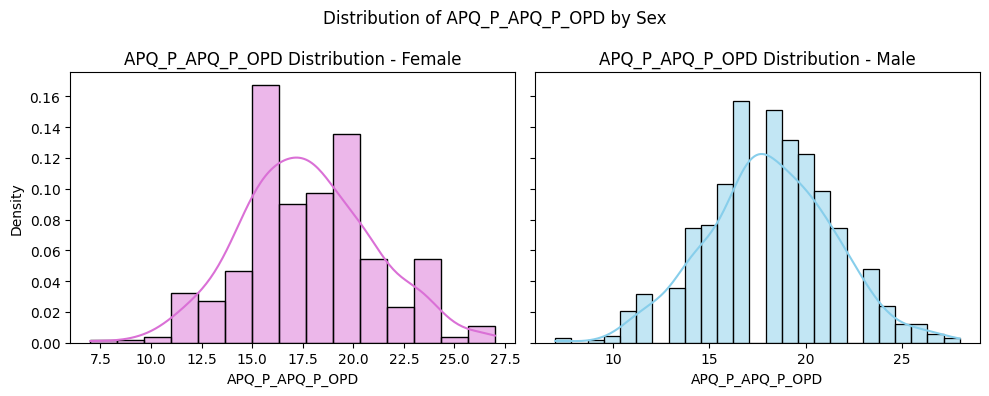

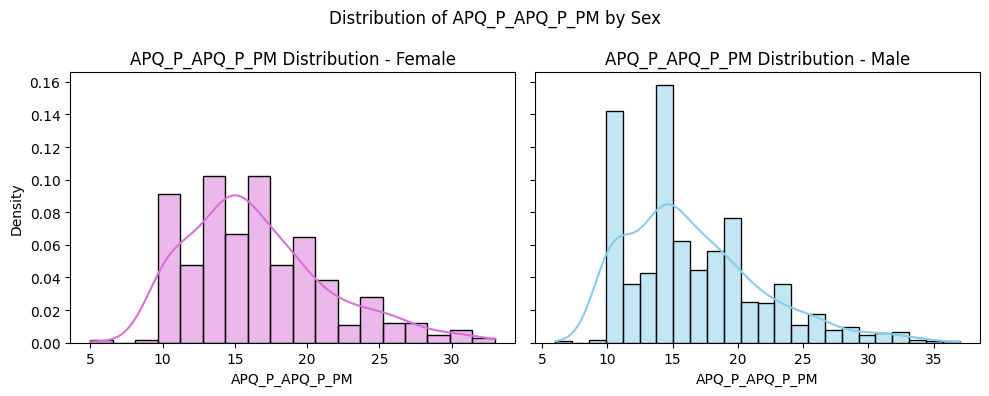

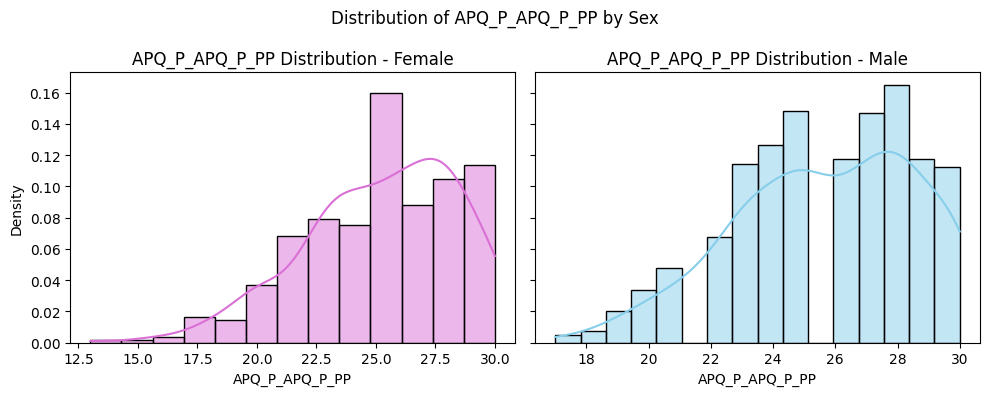

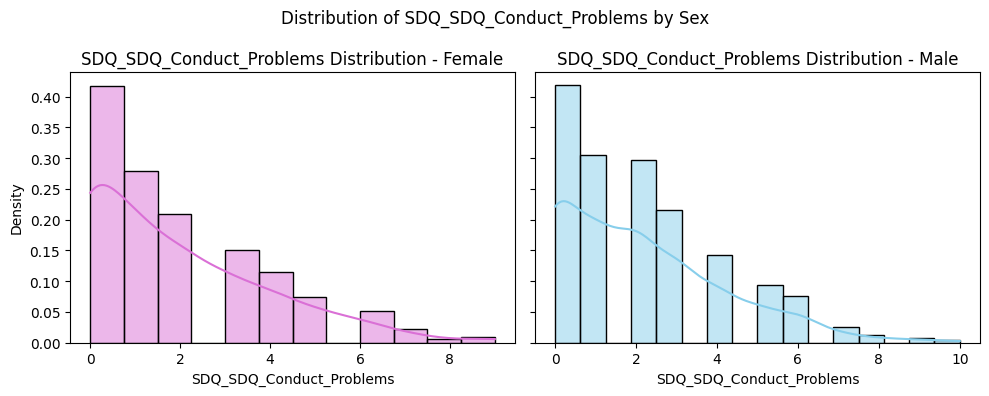

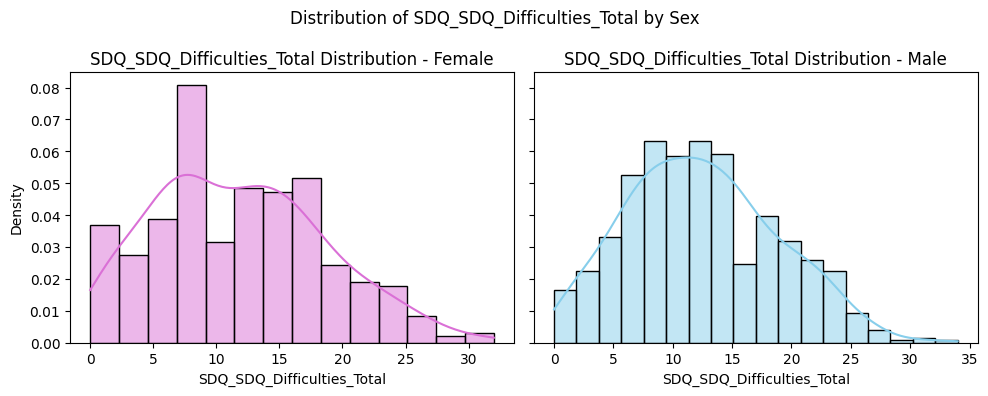

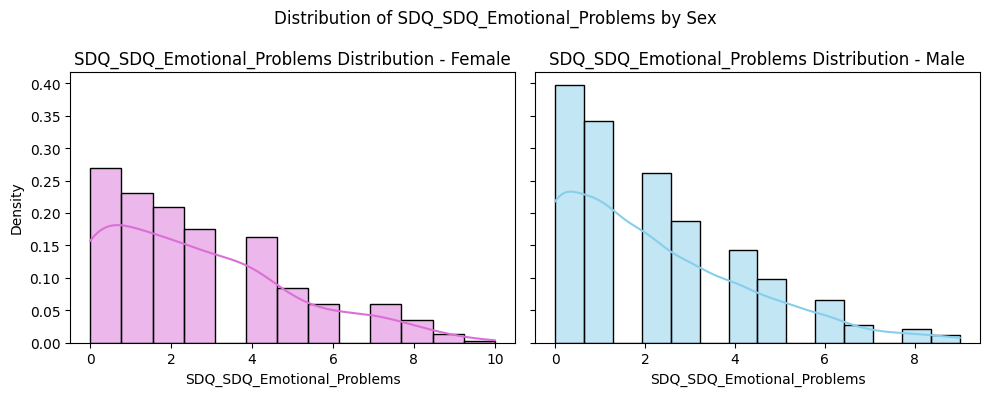

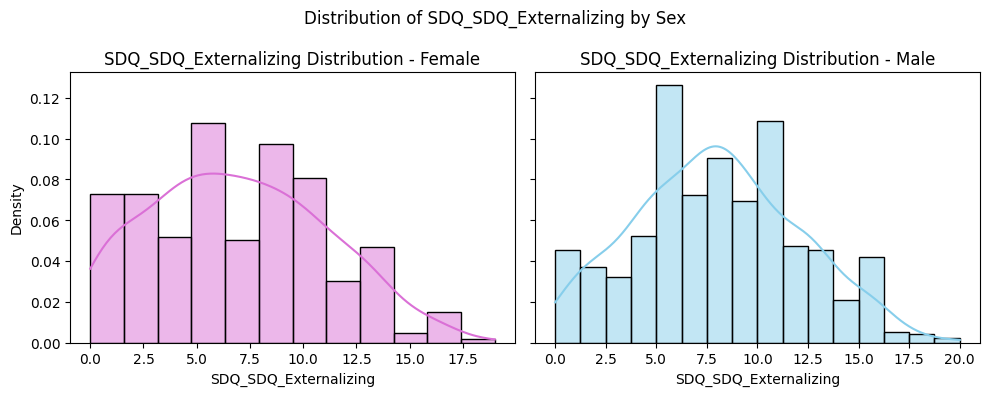

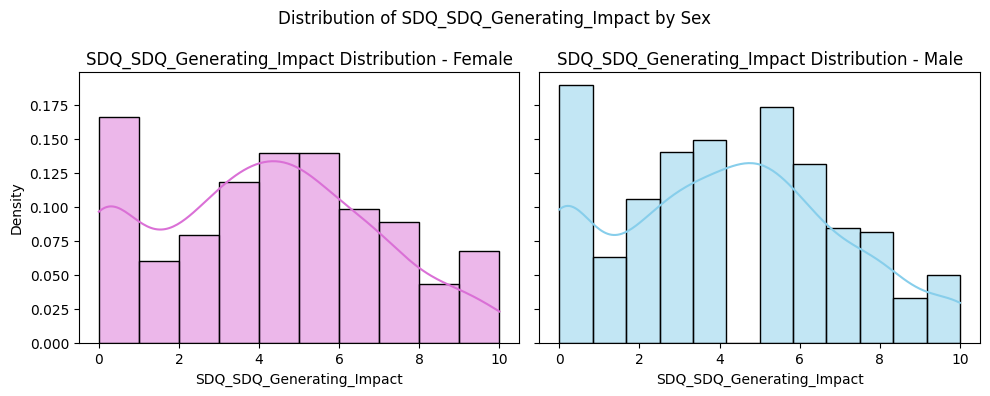

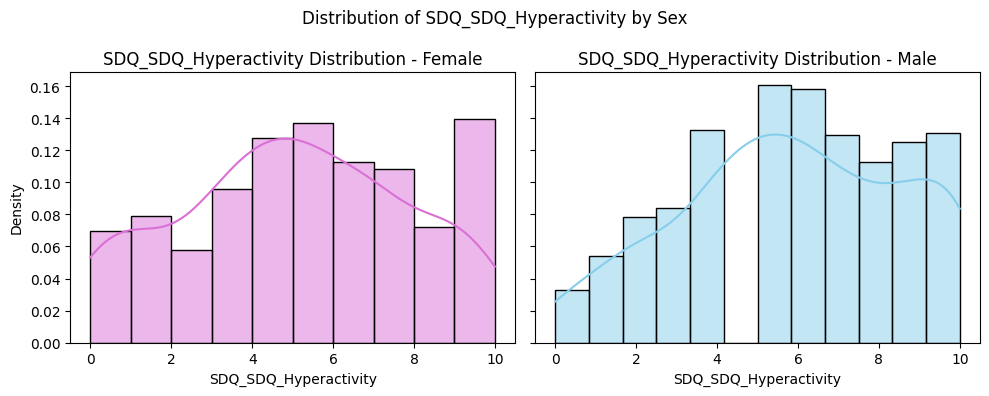

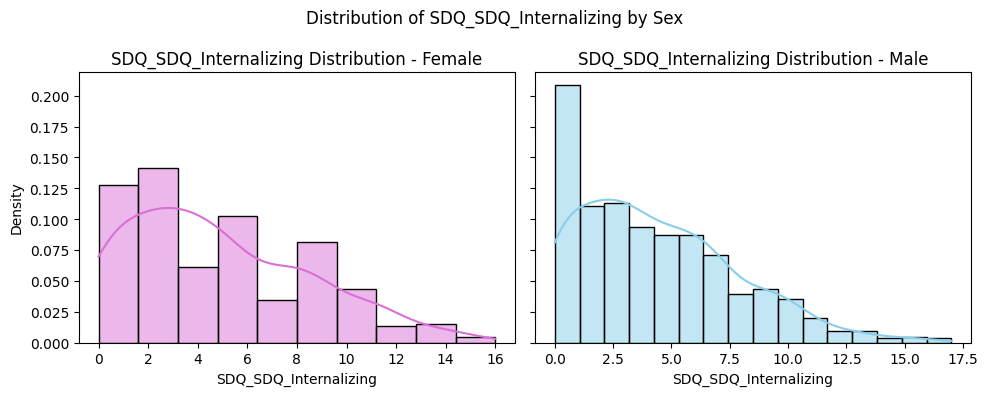

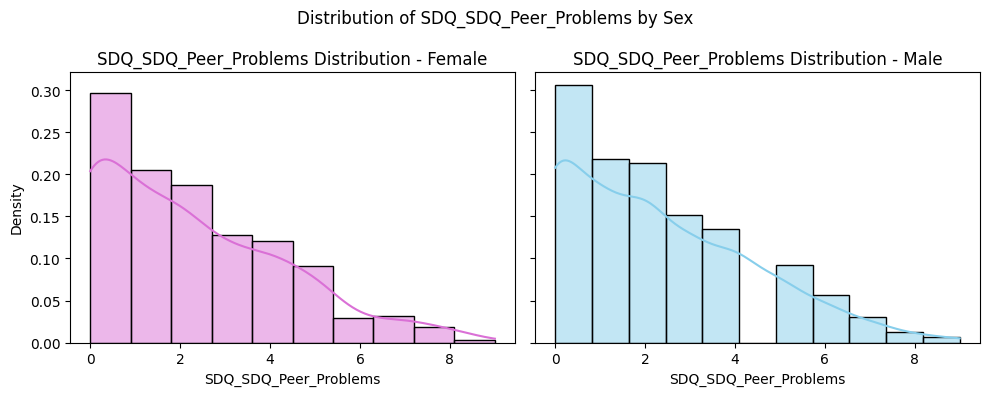

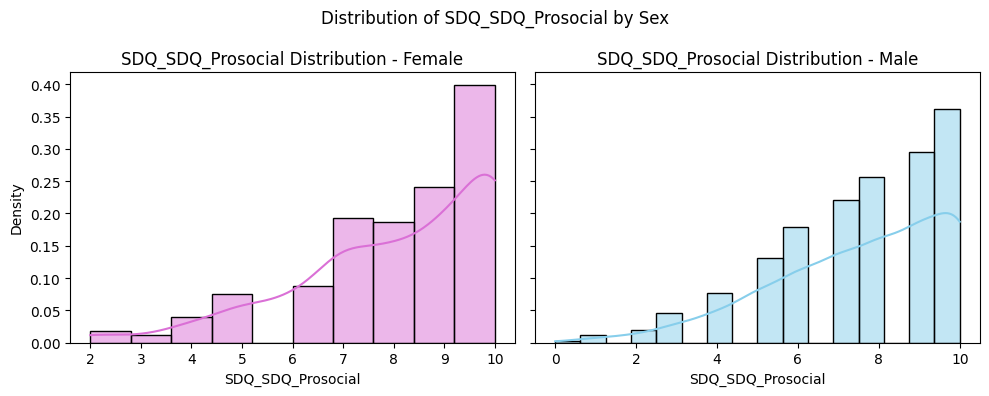

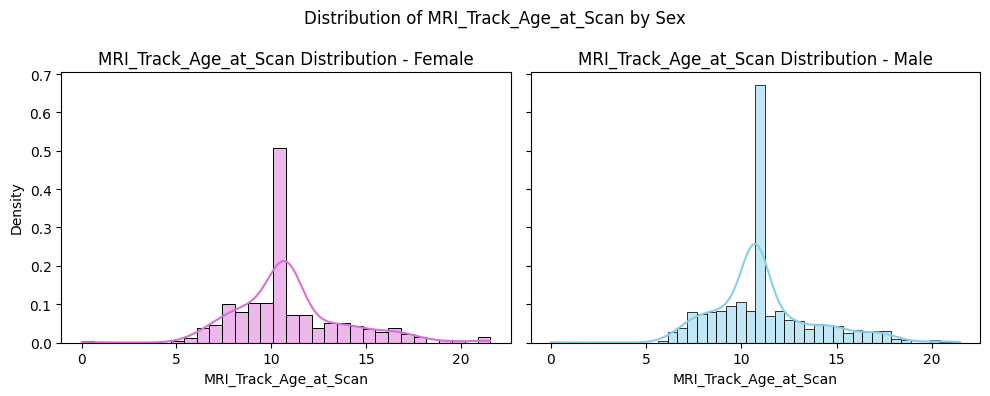

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge quantitative features with Sex_F and ADHD_Outcome
quant_cat_solution_df = (
    train_quantitative_df
    .merge(training_solutions_df[['participant_id', 'Sex_F', 'ADHD_Outcome']], on='participant_id', how='left')
)

# Loop through each quantitative column (skip participant_id)
for quantcol in train_quantitative_df.columns.tolist()[1:]:
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4], sharey=True)

    sns.histplot(
        data=quant_cat_solution_df[quant_cat_solution_df["Sex_F"] == 1],
        x=quantcol,
        ax=ax1, stat="density", kde=True, color='orchid'
    )
    ax1.set_title(f"{quantcol} Distribution - Female")

    sns.histplot(
        data=quant_cat_solution_df[quant_cat_solution_df["Sex_F"] == 0],
        x=quantcol,
        ax=ax2, stat="density", kde=True, color='skyblue'
    )
    ax2.set_title(f"{quantcol} Distribution - Male")

    plt.suptitle(f"Distribution of {quantcol} by Sex")
    plt.tight_layout()
    plt.show()


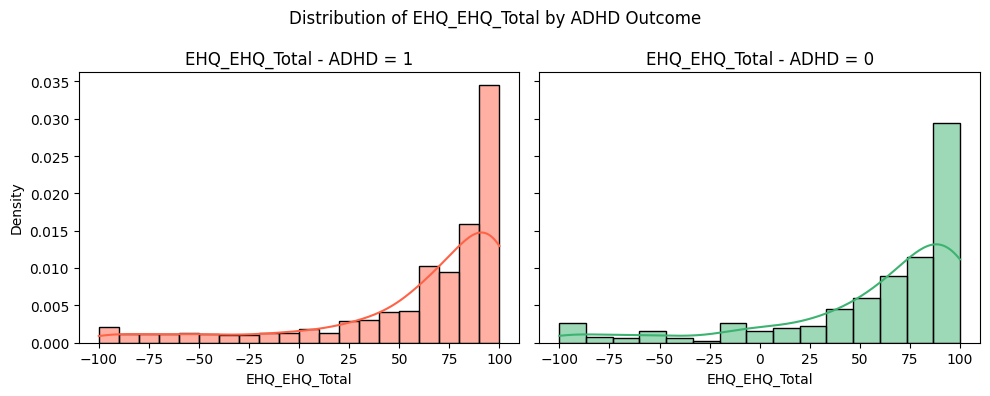

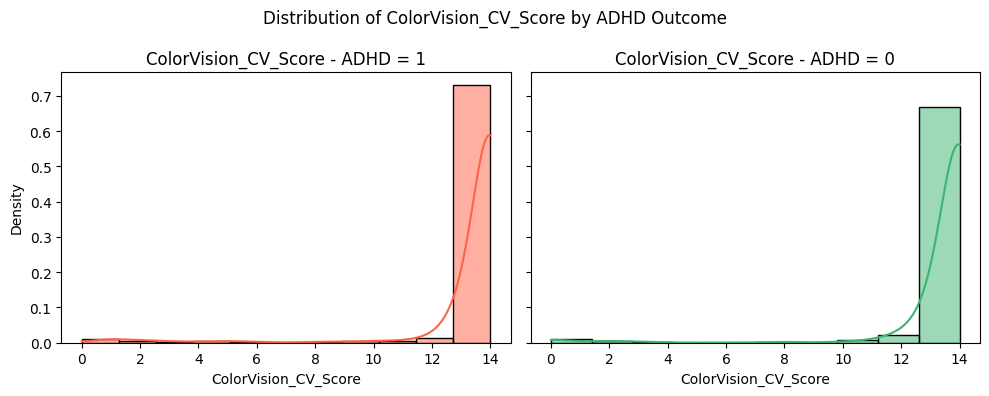

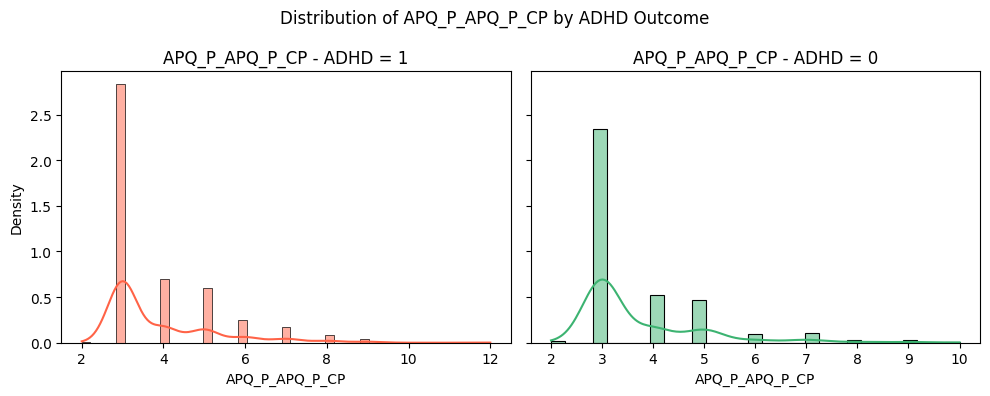

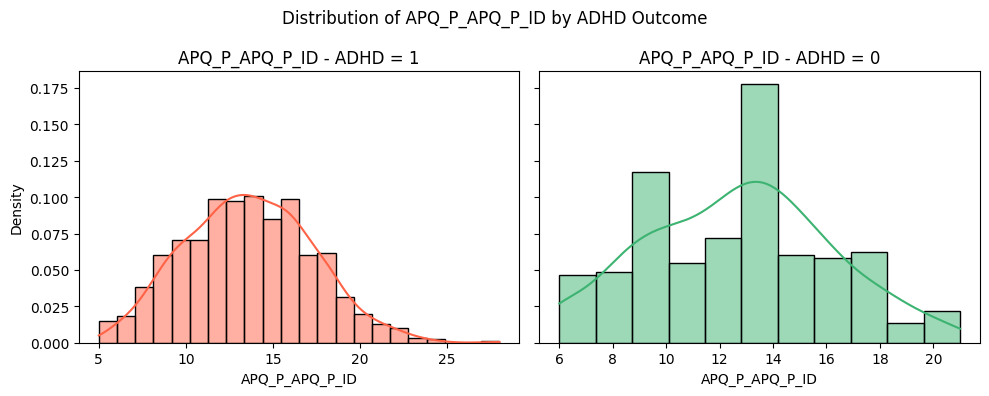

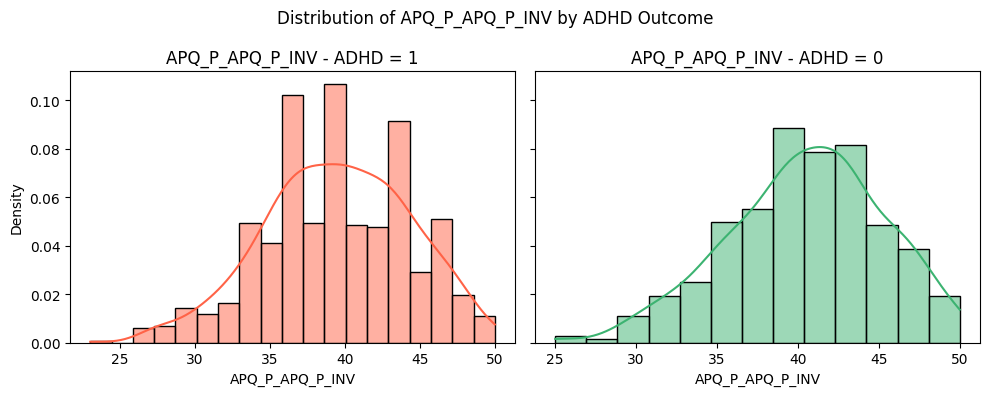

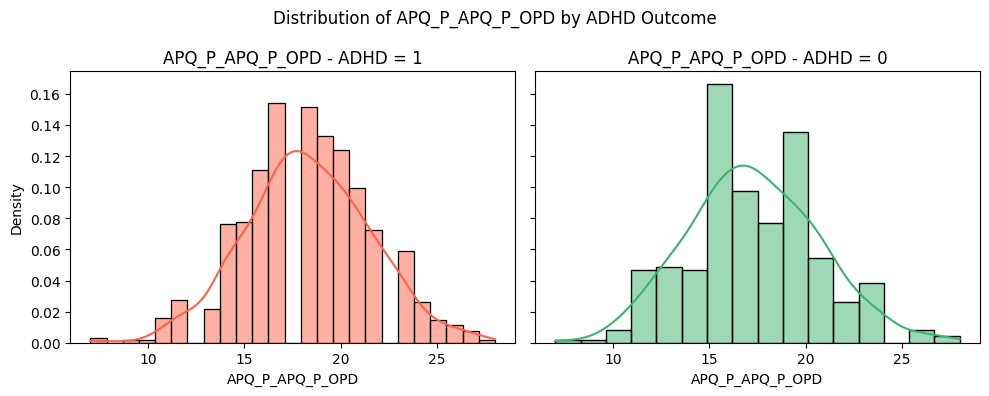

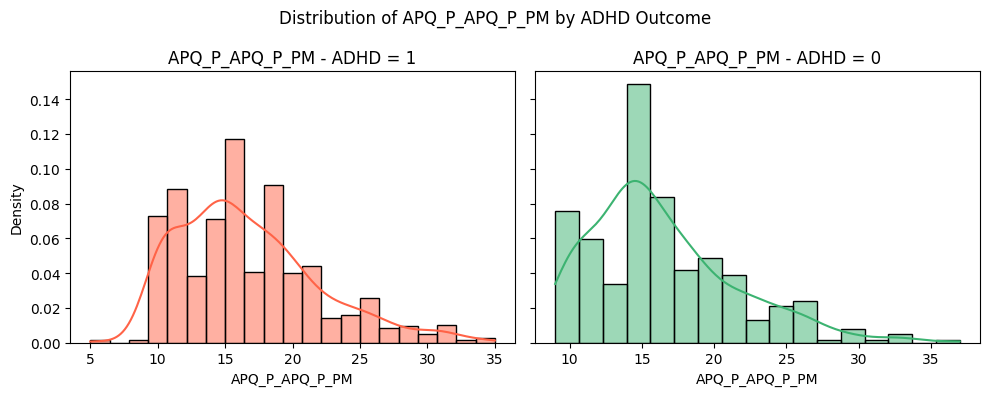

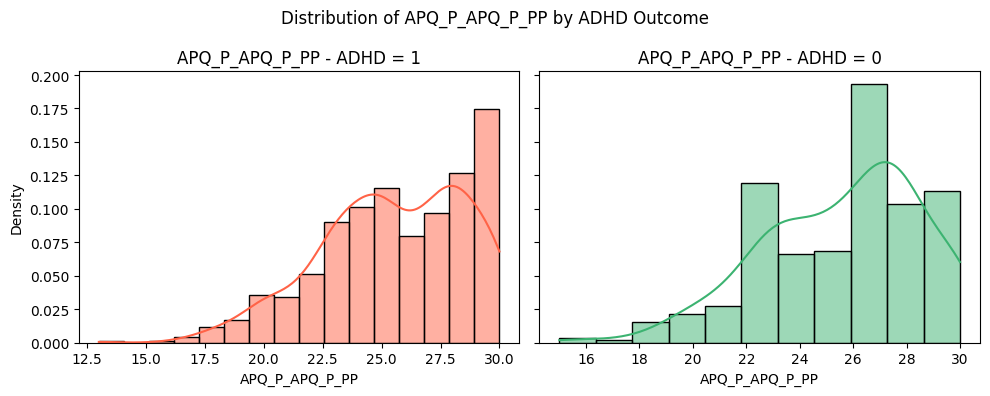

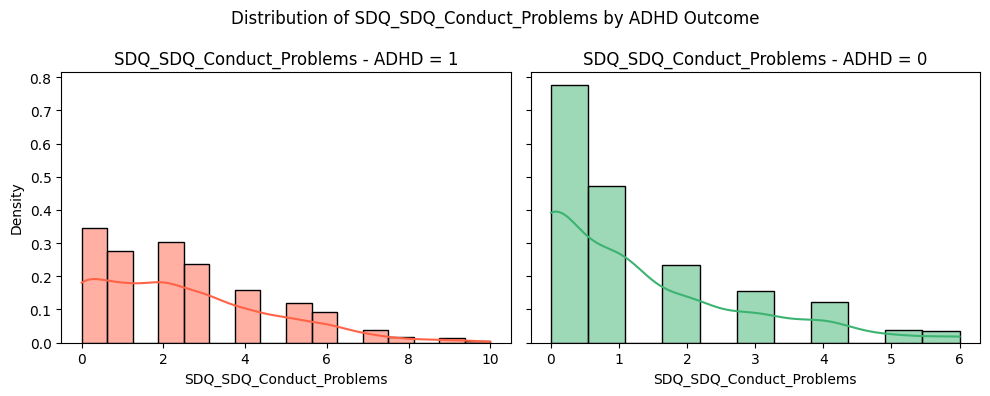

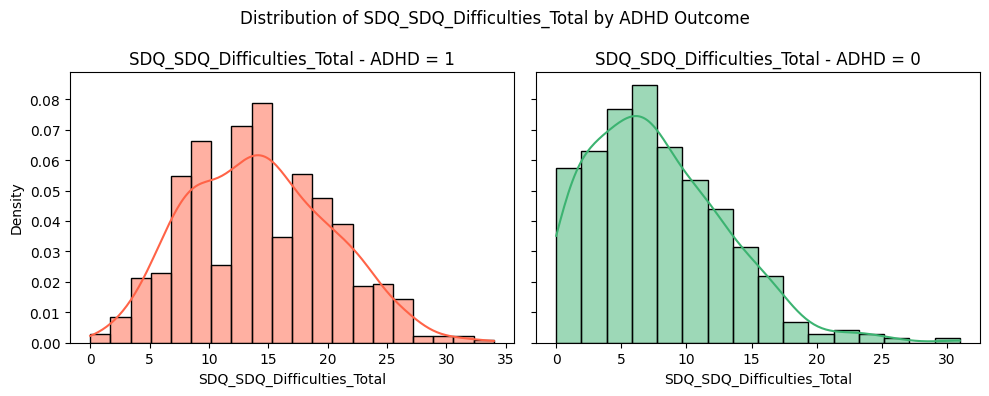

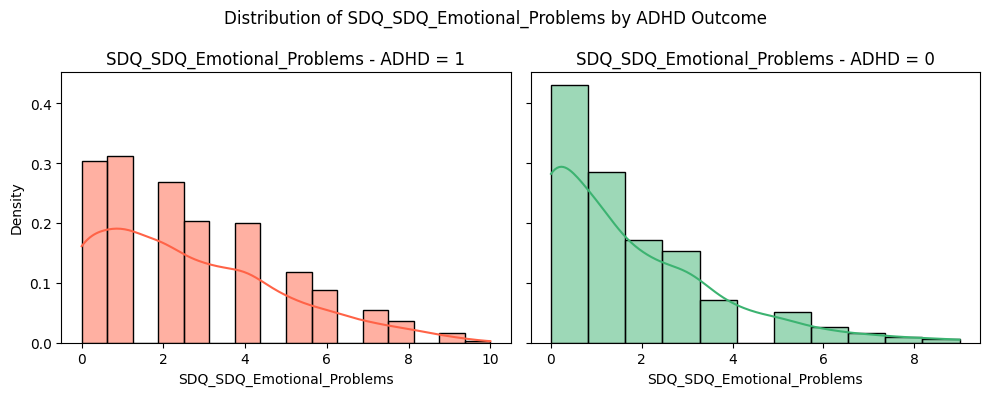

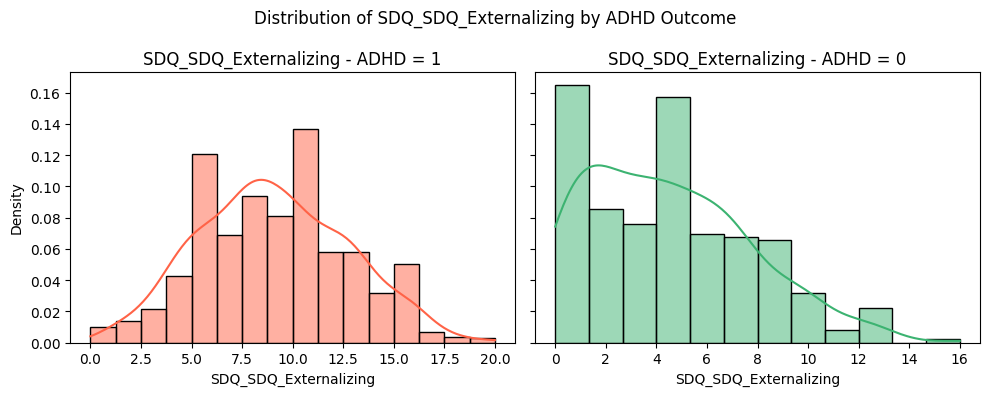

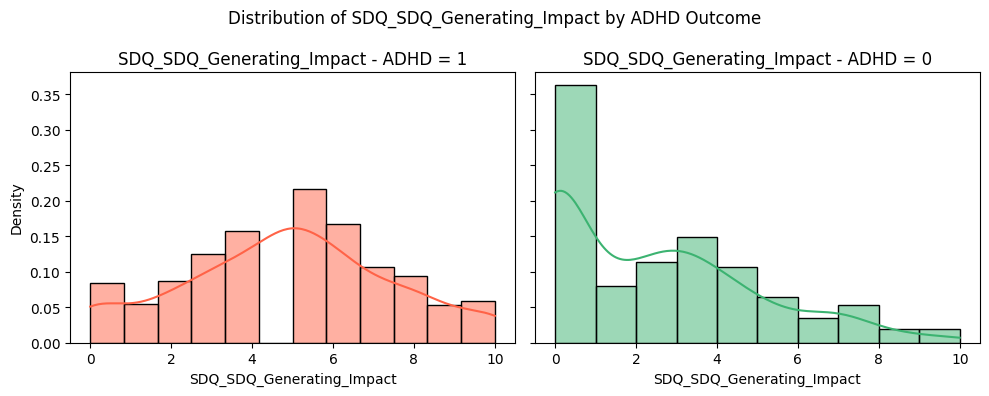

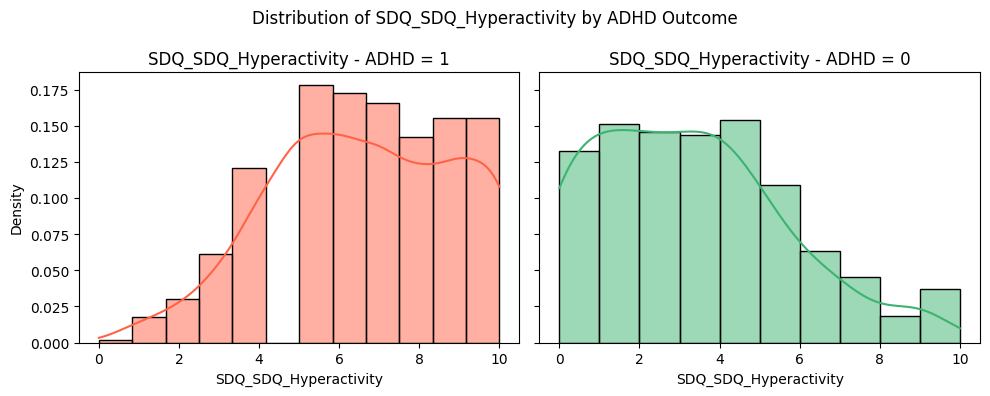

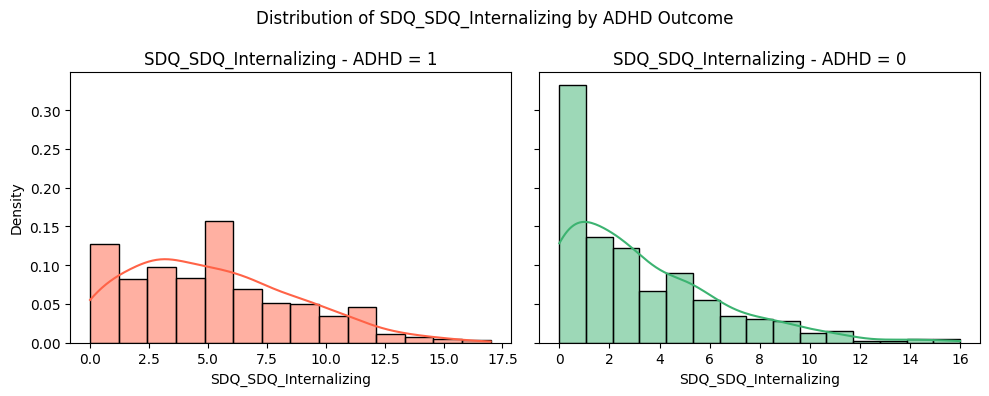

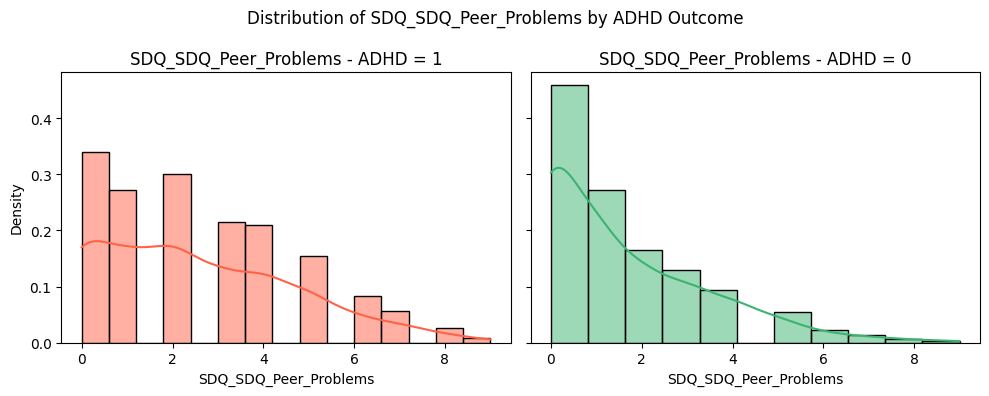

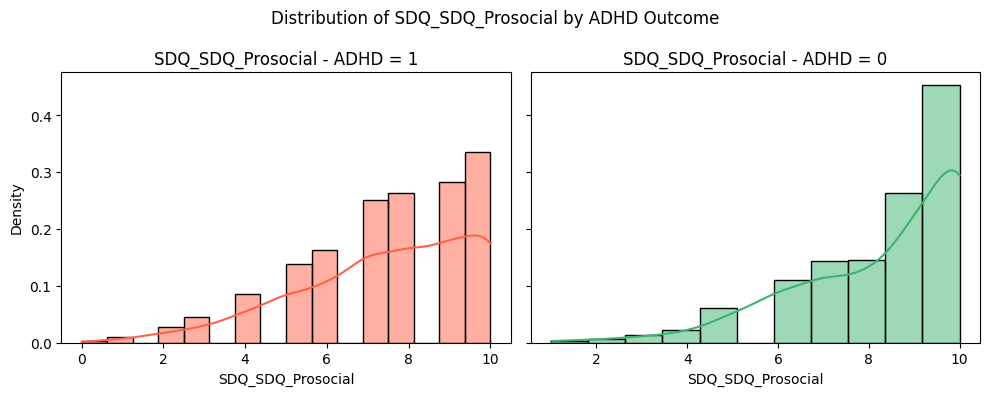

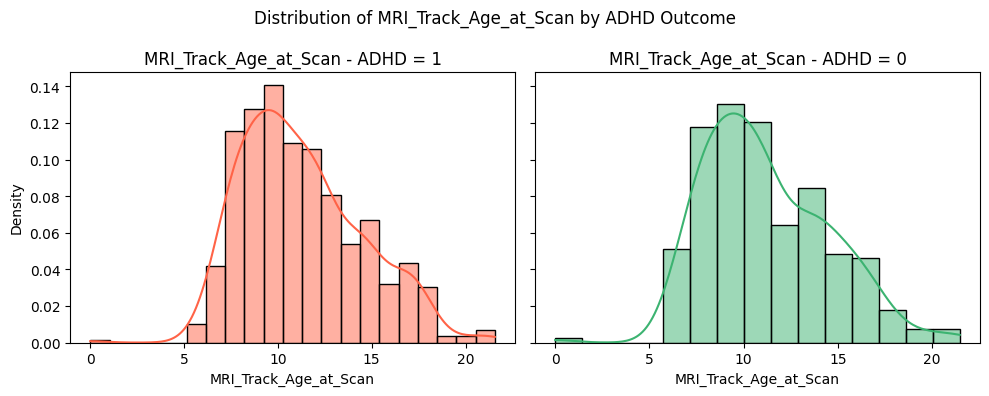

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through quantitative features (skip participant_id)
for quantcol in train_quantitative_df.columns.tolist()[1:]:
    # Merge the column with ADHD_Outcome
    merged_df = train_quantitative_df.loc[:, [quantcol, 'participant_id']].merge(
        training_solutions_df[['participant_id', 'ADHD_Outcome']],
        on='participant_id', how='left'
    ).drop(columns=['participant_id'])

    # Create plots
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=[10, 4], sharey=True)

    sns.histplot(
        data=merged_df[merged_df["ADHD_Outcome"] == 1],
        x=quantcol, ax=ax1, stat="density", kde=True, color='tomato'
    )
    ax1.set_title(f"{quantcol} - ADHD = 1")

    sns.histplot(
        data=merged_df[merged_df["ADHD_Outcome"] == 0],
        x=quantcol, ax=ax2, stat="density", kde=True, color='mediumseagreen'
    )
    ax2.set_title(f"{quantcol} - ADHD = 0")

    plt.suptitle(f"Distribution of {quantcol} by ADHD Outcome")
    plt.tight_layout()
    plt.show()


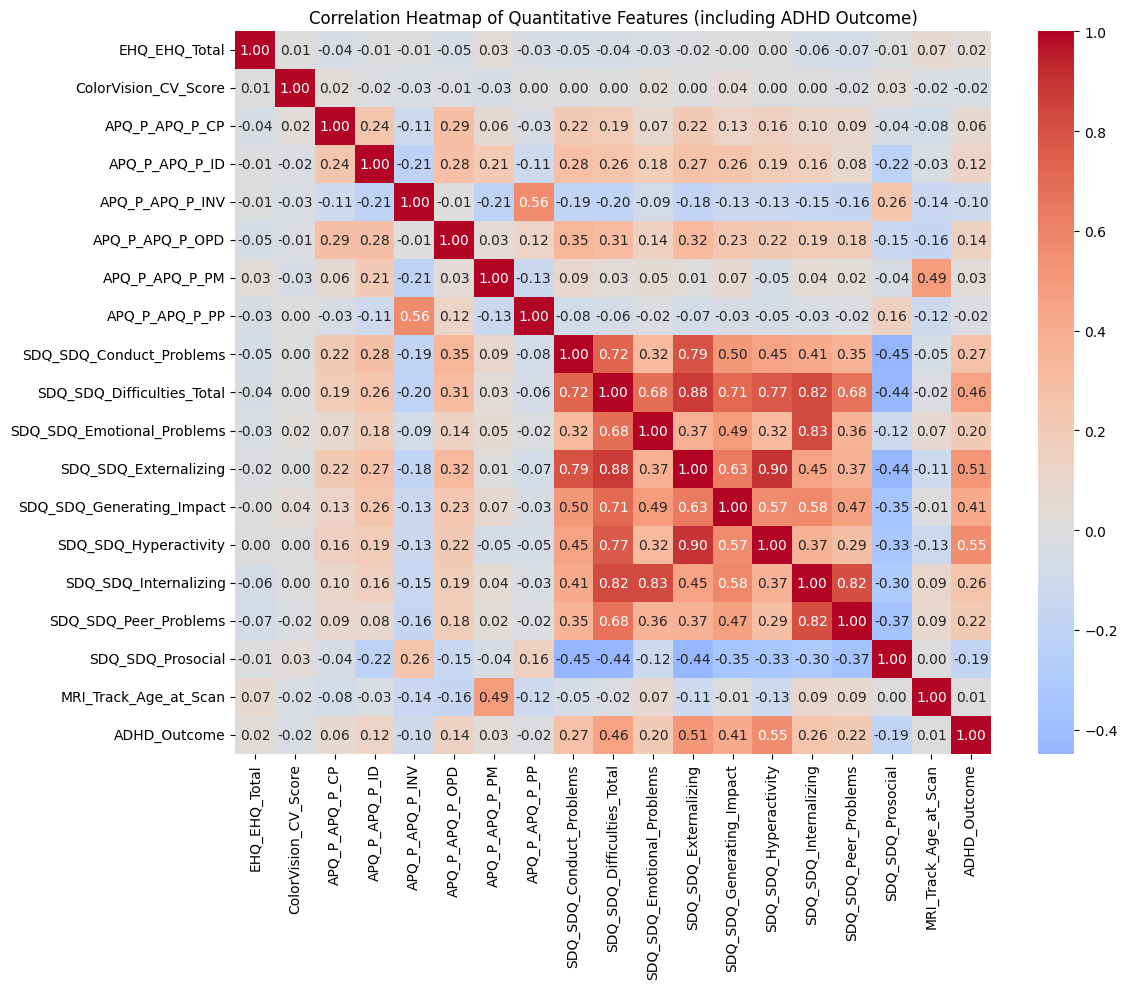

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge quantitative data with ADHD outcome
merged_df = train_quantitative_df.merge(
    training_solutions_df[['participant_id', 'ADHD_Outcome']],
    on='participant_id', how='left'
).drop(columns=['participant_id'])

# Impute missing numeric values with the median
for col in merged_df.columns:
    if merged_df[col].isna().sum() > 0:
        if merged_df[col].dtype in ['float64', 'int64']:
            merged_df[col] = merged_df[col].fillna(merged_df[col].median())
        else:
            print(f"Skipping non-numeric column: {col}")

# Compute the correlation matrix
quant_corr_df = merged_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(quant_corr_df, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Quantitative Features (including ADHD Outcome)")
plt.tight_layout()
plt.show()


<ipython-input-21-21922a9543f9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='single_parent', data=train_categorical_df, palette='Set2')


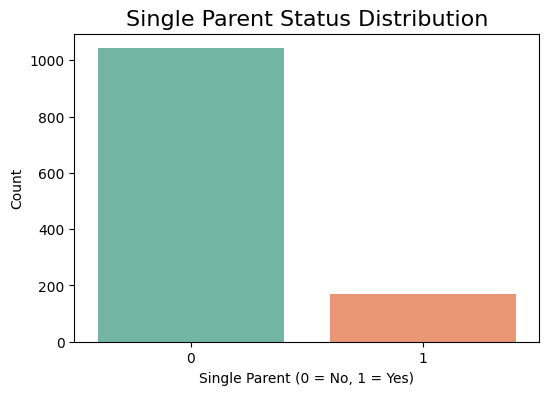

In [ ]:
# 1. Plot the distribution of 'single_parent' in the categorical dataset
plt.figure(figsize=(6, 4))
sns.countplot(x='single_parent', data=train_categorical_df, palette='Set2')
plt.title("Single Parent Status Distribution", fontsize=16)
plt.xlabel("Single Parent (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-22-8d1f5711fd2a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PreInt_Demos_Fam_Child_Ethnicity', data=train_categorical_df, palette='Set1')


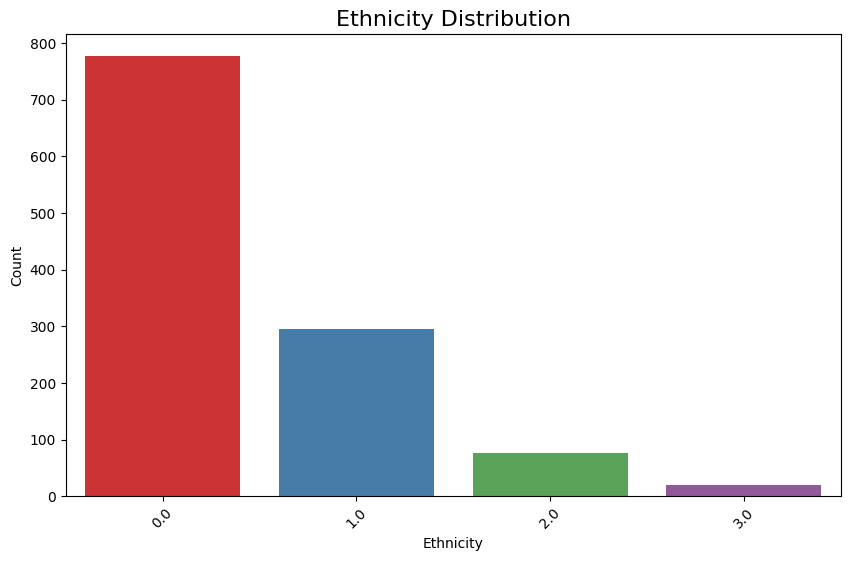

In [ ]:
# 2. Plot the distribution of ethnicity/race if you'd like to analyze demographic diversity
plt.figure(figsize=(10, 6))
sns.countplot(x='PreInt_Demos_Fam_Child_Ethnicity', data=train_categorical_df, palette='Set1')
plt.title("Ethnicity Distribution", fontsize=16)
plt.xlabel("Ethnicity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-24-0d75baa1d4f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PreInt_Demos_Fam_Child_Race', data=train_categorical_df, palette='Set2')


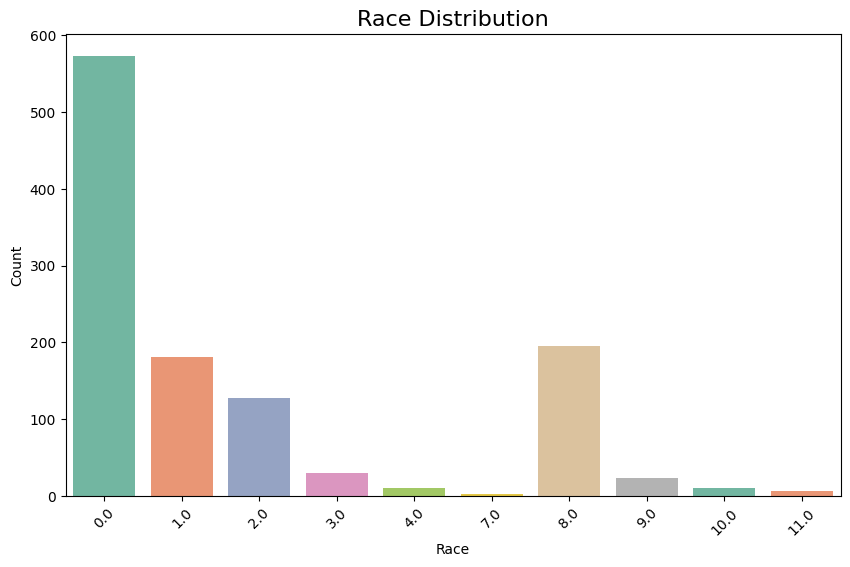

In [ ]:
# 4. Visualize distribution for other categorical variables in the dataset (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x='PreInt_Demos_Fam_Child_Race', data=train_categorical_df, palette='Set2')
plt.title("Race Distribution", fontsize=16)
plt.xlabel("Race")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

 As the test labels are anonymized, use 30 % of the train set to extract a test set for your evaluation.

In [8]:
from sklearn.model_selection import train_test_split

# Merge the features and labels
train_merged_df = train_quantitative_df.merge(
    training_solutions_df[['participant_id', 'ADHD_Outcome']],
    on='participant_id', how='left'
)

# Drop rows with missing ADHD_Outcome
train_merged_df = train_merged_df.dropna(subset=['ADHD_Outcome'])

# Split 70% train / 30% validation
train_set, val_set = train_test_split(train_merged_df, test_size=0.3, random_state=42, stratify=train_merged_df['ADHD_Outcome'])

# Reset index for cleanliness
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)

# Preview sizes
print(f"Train set shape: {train_set.shape}")
print(f"Validation set shape: {val_set.shape}")


Train set shape: (849, 20)
Validation set shape: (364, 20)


 Use MultiOutputClassifier from sklearn to handle the simultaneous prediction of the two targets (sex
 and ADHD diagnosis) while leveraging any potential interdependencies between them

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

# Merge quantitative features with labels
Xy_df = train_quantitative_df.merge(
    training_solutions_df[['participant_id', 'Sex_F', 'ADHD_Outcome']],
    on='participant_id', how='inner'
)

# Drop non-feature columns (e.g., participant_id)
X = Xy_df.drop(columns=['participant_id', 'Sex_F', 'ADHD_Outcome'])
y = Xy_df[['Sex_F', 'ADHD_Outcome']]

# handle any missing values
X = X.fillna(X.median())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit MultiOutputClassifier
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
multi_model = MultiOutputClassifier(base_model)

multi_model.fit(X_train, y_train)
y_pred = multi_model.predict(X_test)

# Evaluate performance
print("Evaluation for Sex_F:")
print(classification_report(y_test['Sex_F'], y_pred[:, 0]))

print("Evaluation for ADHD_Outcome:")
print(classification_report(y_test['ADHD_Outcome'], y_pred[:, 1]))


Evaluation for Sex_F:
              precision    recall  f1-score   support

           0       0.70      0.93      0.80       240
           1       0.62      0.24      0.35       124

    accuracy                           0.69       364
   macro avg       0.66      0.58      0.57       364
weighted avg       0.68      0.69      0.65       364

Evaluation for ADHD_Outcome:
              precision    recall  f1-score   support

           0       0.68      0.51      0.58       122
           1       0.78      0.88      0.83       242

    accuracy                           0.76       364
   macro avg       0.73      0.69      0.70       364
weighted avg       0.75      0.76      0.75       364



#  Data Cleaning and Preprocessing

In [10]:
# For your main dataframes
print("Quantitative metadata missing values:")
print(train_quantitative_df.isnull().sum().sort_values(ascending=False).head(20))

print("\nCategorical metadata missing values:")
print(train_categorical_df.isnull().sum().sort_values(ascending=False).head(20))

print("\nTraining solutions missing values")
print(training_solutions_df.isnull().sum())


Quantitative metadata missing values:
MRI_Track_Age_at_Scan         360
ColorVision_CV_Score           23
EHQ_EHQ_Total                  13
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Prosocial               9
participant_id                  0
dtype: int64

Categorical metadata missing values:
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
Barratt_Barratt_P1_Occ               31
Barratt_Barratt_P1_Edu               15
MRI_Track_Scan_Location  

Handling Missing Values

In [ ]:
Start
 |
 ├── Drop MRV individuals (Basic_Demos_Study_Site == 2)
 |
 ├── MRI_Track_Scan_Location
 |     ├── If missing and Study Site == 1 → Set to 2.0 (RUBIC)
 |     └── Else → Mode Imputation
 |
 ├── Race and Ethnicity
 |     ├── Create missing indicators (binary flags)
 |     ├── If Race missing → Fill using Ethnicity (majority rule)
 |     ├── If Ethnicity missing → Fill using Race (majority rule)
 |     └── If still missing → Fill as "Missing"
 |
 ├── Parent Occupation & Education
 |     └── If missing → Fill with "Missing" category
 |
 ├── Quantitative Features
 |     └── Fill missing values with feature-wise Median
 |
End (dataset ready for model training)


In [11]:
# --- Step 0: Drop MRV (Study Site 2) ---
train_categorical_df = train_categorical_df[train_categorical_df['Basic_Demos_Study_Site'] != 2]
test_categorical_df = test_categorical_df[test_categorical_df['Basic_Demos_Study_Site'] != 2]

# --- Step 1: Impute MRI_Track_Scan_Location ---
for df in [train_categorical_df, test_categorical_df]:
    df.loc[(df['MRI_Track_Scan_Location'].isna()) & (df['Basic_Demos_Study_Site'] == 1), 'MRI_Track_Scan_Location'] = 2.0

# --- Step 2: Race and Ethnicity Imputation + Indicators ---
for df in [train_categorical_df, test_categorical_df]:
    # Create missing indicators
    df['PreInt_Demos_Fam_Child_Race_missing'] = df['PreInt_Demos_Fam_Child_Race'].isna().astype(int)
    df['PreInt_Demos_Fam_Child_Ethnicity_missing'] = df['PreInt_Demos_Fam_Child_Ethnicity'].isna().astype(int)

    # Fill Race using Ethnicity
    df.loc[df['PreInt_Demos_Fam_Child_Race'].isna(), 'PreInt_Demos_Fam_Child_Race'] = df['PreInt_Demos_Fam_Child_Ethnicity']

    # Fill Ethnicity using Race
    df.loc[df['PreInt_Demos_Fam_Child_Ethnicity'].isna(), 'PreInt_Demos_Fam_Child_Ethnicity'] = df['PreInt_Demos_Fam_Child_Race']

    # Still missing? Fill with "Missing"
    df['PreInt_Demos_Fam_Child_Race'].fillna('Missing', inplace=True)
    df['PreInt_Demos_Fam_Child_Ethnicity'].fillna('Missing', inplace=True)

# --- Step 3: Occupation and Education ---
cat_features = ['Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ',
                'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P2_Edu']

for df in [train_categorical_df, test_categorical_df]:
    for col in cat_features:
        df[col] = df[col].fillna('Missing')

# --- Step 4: Quantitative Features Median Imputation ---
quant_features = ['MRI_Track_Age_at_Scan', 'ColorVision_CV_Score', 'EHQ_EHQ_Total',
                  'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_CP', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_ID',
                  'APQ_P_APQ_P_OPD', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Difficulties_Total',
                  'SDQ_SDQ_Conduct_Problems', 'SDQ_SDQ_Hyperactivity', 'SDQ_SDQ_Emotional_Problems',
                  'SDQ_SDQ_Generating_Impact', 'SDQ_SDQ_Externalizing', 'SDQ_SDQ_Peer_Problems',
                  'SDQ_SDQ_Internalizing', 'SDQ_SDQ_Prosocial']

for df in [train_quantitative_df, test_quantitative_df]:
    for col in quant_features:
        median_value = df[col].median()
        df[col] = df[col].fillna(median_value)


<ipython-input-11-878156e32c98>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PreInt_Demos_Fam_Child_Race_missing'] = df['PreInt_Demos_Fam_Child_Race'].isna().astype(int)
<ipython-input-11-878156e32c98>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PreInt_Demos_Fam_Child_Ethnicity_missing'] = df['PreInt_Demos_Fam_Child_Ethnicity'].isna().astype(int)
<ipython-input-11-878156e32c98>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment usi

In [12]:
# For your main dataframes
print("Quantitative metadata missing values:")
print(train_quantitative_df.isnull().sum().sort_values(ascending=False).head(20))

print("\nCategorical metadata missing values:")
print(train_categorical_df.isnull().sum().sort_values(ascending=False).head(20))

print("\nTraining solutions missing values")
print(training_solutions_df.isnull().sum())

print("\nNo more missing values")


Quantitative metadata missing values:
participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64

Categorical metadata missing values:
participant_id                              0
Basic_Demos_Enroll_Year                     0
Basic_Demos_Study_Site                      0
PreInt_Demos_Fam_Child_Ethnicity            0
PreInt_Demos_Fam_Child_Race                 0
MRI_Track_Scan_Location                     0
Barratt_Barratt_P1_Edu     

We’ll train these 5 classifiers:

KNN

Decision Tree

Random Forest

Logistic Regression

Neural Network (basic MLP)

We'll:

Train them

Evaluate (Accuracy, F1 Score, Confusion Matrix)

Plot bar graphs comparing performance

Plot confusion matrices



In [13]:
train_df = training_solutions_df.merge(train_quantitative_df, on='participant_id')
train_df = train_df.merge(train_categorical_df, on='participant_id')


<ipython-input-14-2591958cfcf1>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['PreInt_Demos_Fam_Child_Race'].fillna('Missing', inplace=True)
<ipython-input-14-2591958cfcf1>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Accuracy: 0.5352697095435685
F1 Score: 0.6859334627302756


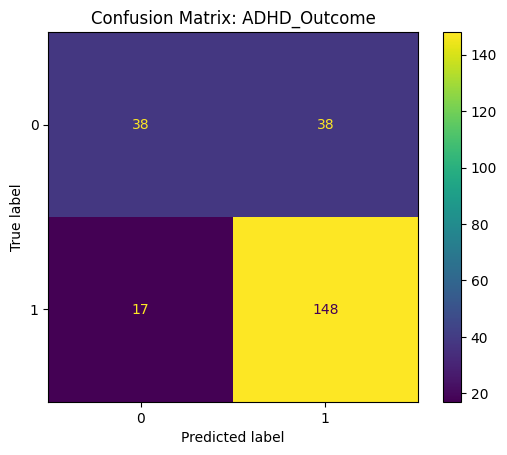

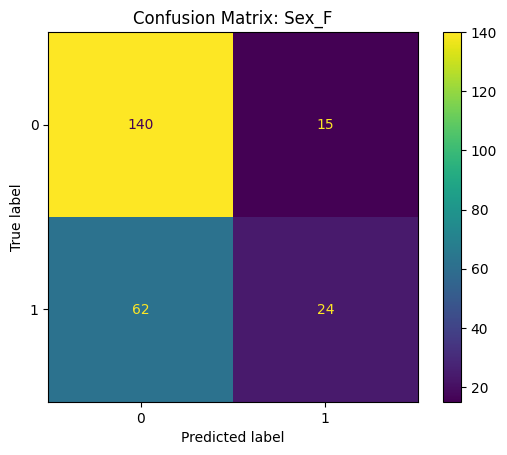

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Separate features and targets
X = train_df.drop(columns=['ADHD_Outcome', 'Sex_F', 'participant_id'])
y = train_df[['ADHD_Outcome', 'Sex_F']]  # Use both ADHD_Outcome and Sex_F as target

# Convert mixed type columns to strings
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = X[col].astype(str)

# Handle missing values in categorical columns
X['PreInt_Demos_Fam_Child_Race'].fillna('Missing', inplace=True)
X['PreInt_Demos_Fam_Child_Ethnicity'].fillna('Missing', inplace=True)

# Identify numeric columns (quantitative features)
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Create a column transformer to handle both scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)  # Encode categorical columns
    ])

# Create a Logistic Regression model and wrap it with MultiOutputClassifier for multi-output classification
model = MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42))

# Wrap the preprocessing and model in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y['ADHD_Outcome'], random_state=42, test_size=0.2)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")

# Plot confusion matrix
cm = confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0])  # For ADHD_Outcome
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix: ADHD_Outcome")
plt.show()

cm = confusion_matrix(y_test['Sex_F'], y_pred[:, 1])  # For Sex_F
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix: Sex_F")
plt.show()


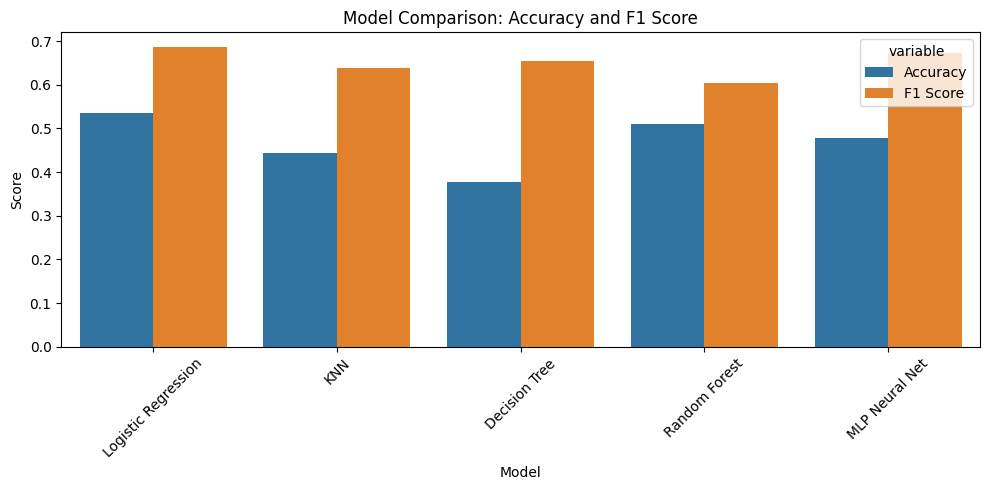

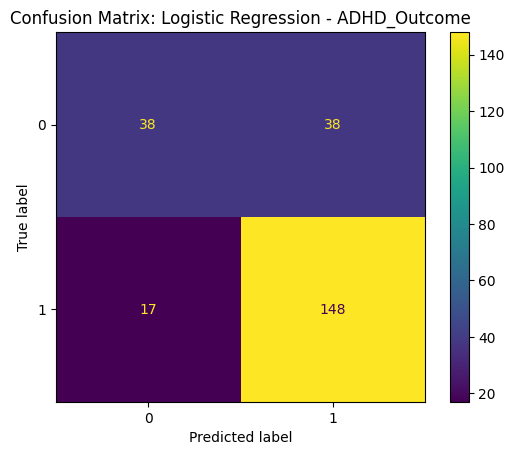

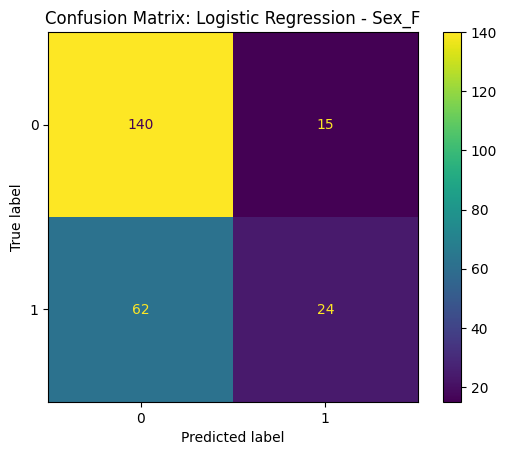

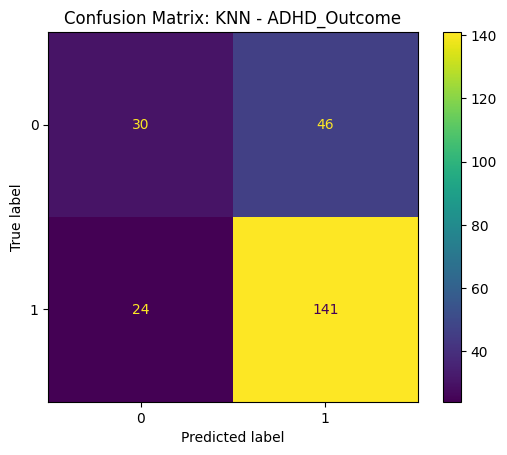

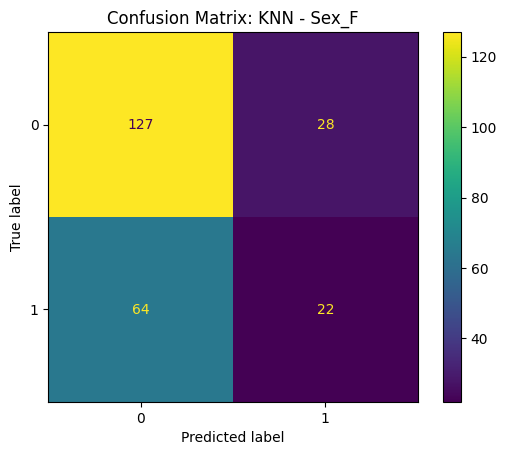

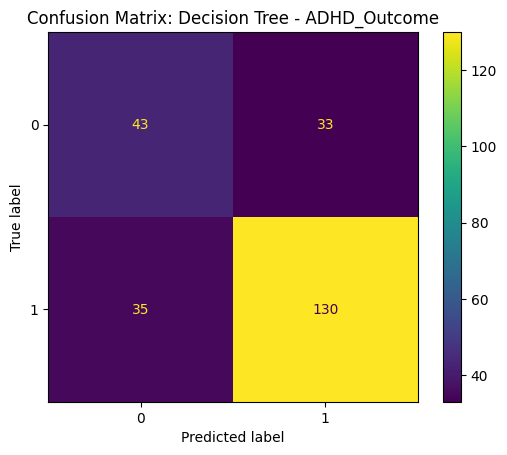

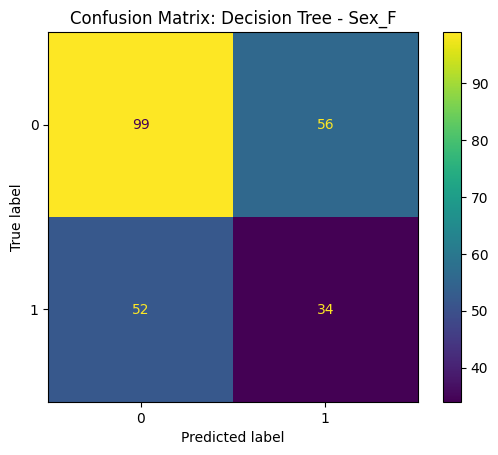

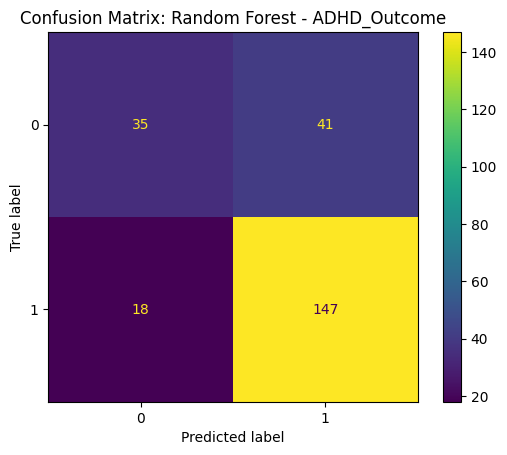

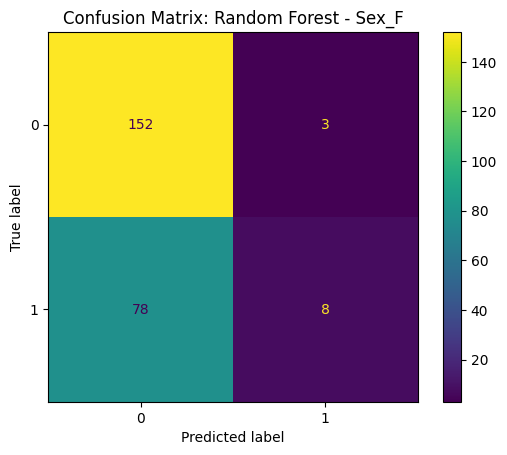

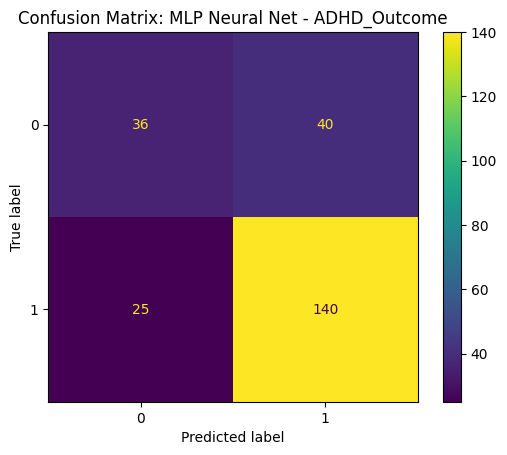

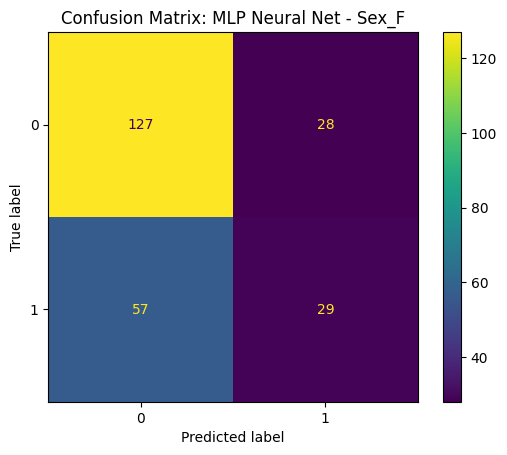

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


X = train_df.drop(columns=['ADHD_Outcome', 'Sex_F', 'participant_id'])
y = train_df[['ADHD_Outcome', 'Sex_F']]

# Fix chained assignment warnings
X['PreInt_Demos_Fam_Child_Race'] = X['PreInt_Demos_Fam_Child_Race'].fillna('Missing')
X['PreInt_Demos_Fam_Child_Ethnicity'] = X['PreInt_Demos_Fam_Child_Ethnicity'].fillna('Missing')

# Convert object types to string explicitly
cat_cols = X.select_dtypes(include=['object']).columns
X[cat_cols] = X[cat_cols].astype(str)

# Identify numeric columns
numeric_cols = X.select_dtypes(include=[np.number]).columns

# Preprocessor (shared for all models)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y['ADHD_Outcome'], random_state=42, test_size=0.2)

# Classifier list
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP Neural Net': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Store results
results = []
conf_matrices = {}

# Training & Evaluation Loop
for name, clf in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultiOutputClassifier(clf))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

    conf_matrices[name] = {
        'ADHD_Outcome': confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0]),
        'Sex_F': confusion_matrix(y_test['Sex_F'], y_pred[:, 1])
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot accuracy and F1 score bar graphs
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title("Model Comparison: Accuracy and F1 Score")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot confusion matrices
for model_name, cms in conf_matrices.items():
    for target, cm in cms.items():
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title(f"Confusion Matrix: {model_name} - {target}")
        plt.show()


In [16]:
# Training & Evaluation Loop
for name, clf in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultiOutputClassifier(clf))
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append({'Model': name, 'Accuracy': acc, 'F1 Score': f1})

    conf_matrices[name] = {
        'ADHD_Outcome': confusion_matrix(y_test['ADHD_Outcome'], y_pred[:, 0]),
        'Sex_F': confusion_matrix(y_test['Sex_F'], y_pred[:, 1])
    }

    # Print results for this model
    print(f"\nModel: {name}")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1 Score: {f1:.4f}")



Model: Logistic Regression
  Accuracy: 0.5353
  F1 Score: 0.6859

Model: KNN
  Accuracy: 0.4440
  F1 Score: 0.6375

Model: Decision Tree
  Accuracy: 0.3776
  F1 Score: 0.6535

Model: Random Forest
  Accuracy: 0.5104
  F1 Score: 0.6040

Model: MLP Neural Net
  Accuracy: 0.4772
  F1 Score: 0.6725


In [18]:
train_df


,participant_id,ADHD_Outcome,Sex_F,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,...,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,PreInt_Demos_Fam_Child_Race_missing,PreInt_Demos_Fam_Child_Ethnicity_missing
0,UmrK0vMLopoR,1,1,40.00,13.0,3.0,10.0,47.0,13.0,11.0,...,1,0.0,0.0,1.0,21.0,45.0,21.0,45.0,0,0
1,CPaeQkhcjg7d,1,0,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,...,3,1.0,2.0,3.0,15.0,15.0,Missing,Missing,0,0
2,Nb4EetVPm3gs,1,0,-46.67,14.0,4.0,10.0,35.0,16.0,10.0,...,1,1.0,8.0,1.0,18.0,40.0,Missing,Missing,0,0
3,p4vPhVu91o4b,1,1,-26.68,10.0,5.0,12.0,39.0,19.0,16.0,...,3,0.0,8.0,3.0,15.0,30.0,18.0,0.0,0,0
4,M09PXs7arQ5E,1,1,0.00,14.0,5.0,15.0,40.0,20.0,24.0,...,3,0.0,1.0,3.0,15.0,20.0,Missing,Missing,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,Atx7oub96GXS,0,0,87.80,14.0,5.0,14.0,39.0,20.0,15.0,...,1,0.0,0.0,2.0,21.0,40.0,21.0,40.0,0,0
1198,groSbUfkQngM,0,1,77.80,14.0,3.0,10.0,32.0,20.0,11.0,...,1,0.0,0.0,1.0,18.0,35.0,Missing,Missing,1,0
1199,zmxGvIrOD0bt,0,1,16.68,14.0,3.0,16.0,28.0,15.0,19.0,...,1,1.0,2.0,1.0,18.0,20.0,Missing,Missing,0,0
1200,rOmWFuJCud5G,0,0,53.40,14.0,3.0,14.0,34.0,18.0,23.0,...,3,0.0,8.0,3.0,21.0,40.0,18.0,45.0,0,0


In [17]:
# Retrain best model on full train data
best_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(LogisticRegression(max_iter=1000, random_state=42)))
])
best_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['EHQ_EHQ_Total', 'ColorVision_CV_Score', 'APQ_P_APQ_P_CP',
       'APQ_P_APQ_P_ID', 'APQ_P_APQ_P_INV', 'APQ_P_APQ_P_OPD',
       'APQ_P_APQ_P_PM', 'APQ_P_APQ_P_PP', 'SDQ_SDQ_Conduct_Problems',
       'SDQ_SDQ_Difficulties_Total', 'SDQ_SDQ_Emotional_Problems',
       'SDQ_SDQ_Externalizing', 'SD...
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['PreInt_Demos_Fam_Child_Ethnicity', 'PreInt_Demos_Fam_Child_Race',
       'Barratt_Barratt_P1_Edu', 'Barratt_Barratt_P1_Occ',
       'Barratt_Barratt_P2_Edu', 'Barratt_Barratt_P2_Occ'],
      dtype='object'))])),
                ('classifier',
                 MultiOutputClassifier(estimator=LogisticRegression(max_iter=1000,
                                                                    random_state=42)))])

In [18]:
from sklearn.metrics import accuracy_score, f1_score

# Make predictions on the training data (to check fit)
y_pred_full = best_model.predict(X)

# Compute accuracy and F1 score
acc_full = accuracy_score(y, y_pred_full)
f1_full = f1_score(y, y_pred_full, average='weighted')

print("Evaluation on Full Training Data:")
print(f"  Accuracy: {acc_full:.4f}")
print(f"  F1 Score: {f1_full:.4f}")


Evaluation on Full Training Data:
  Accuracy: 0.5740
  F1 Score: 0.7239
